In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader

In [2]:
df = pd.read_csv("./Cleaned_Laptop_data.csv")
print(df.shape)
df.head()

(896, 23)


,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [3]:
df.columns[df.isin(['Missing']).any()]  

Index(['model', 'processor_gnrtn', 'display_size'], dtype='object')

In [4]:
len(df["model"].unique())

117

In [5]:
len(df.loc[df['model'] == "Missing"])

95

In [6]:
#df.drop(["model"], axis = 1, inplace=True)
df["brand"] = df["brand"] + df["model"]
df.drop(["model"], axis = 1, inplace=True)

In [7]:
df.loc[df['processor_gnrtn'] == "Missing"]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
14,ASUSVivoBook,Intel,Celeron Dual,Missing,4 GB GB,DDR4,0 GB,512 GB,Windows,64-bit,...,Missing,0,No,No,26990,28990,6,0.0,0,0
15,ASUSEeeBook,Intel,Celeron Dual,Missing,4 GB GB,DDR4,0 GB,512 GB,Windows,64-bit,...,Missing,0,No,No,22990,27990,17,0.0,0,0
16,ASUSEeeBook,Intel,Celeron Dual,Missing,4 GB GB,DDR4,0 GB,512 GB,Windows,32-bit,...,Missing,0,No,No,21990,25990,15,3.5,31,3
23,AvitaCosmos,Intel,Celeron Dual,Missing,4 GB GB,DDR4,0 GB,512 GB,Windows,64-bit,...,Missing,0,No,No,17490,23490,25,3.6,1120,196
24,ASUSEeeBook,Intel,Celeron Dual,Missing,4 GB GB,DDR4,0 GB,512 GB,Windows,64-bit,...,Missing,0,No,No,22990,27990,17,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,ASUSROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,64-bit,...,16,1,No,No,135990,172990,21,0.0,0,0
891,ASUSROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,64-bit,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUSRyzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,64-bit,...,Missing,1,No,No,149990,0,0,0.0,0,0
893,ASUSRyzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,64-bit,...,16,1,No,No,142990,0,0,0.0,0,0


In [8]:
df['processor_gnrtn'].replace(to_replace='Missing', value= '', inplace= True)
df.loc[df['processor_gnrtn'] == "Missing"]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews


In [9]:
df["processor_brand"] = df["processor_brand"] + df["processor_name"] + df['processor_gnrtn']

In [10]:
print(len(df["processor_brand"].unique()))
df.drop(["processor_name", "processor_gnrtn"], axis = 1, inplace=True)
df.head()

46


,brand,processor_brand,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,LenovoA6-9225,AMDA6-9225 Processor10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,24990,32790,23,3.7,63,12
1,LenovoIdeapad,AMDAPU Dual10th,4 GB GB,DDR4,0 GB,512 GB,Windows,64-bit,0,Casual,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,AvitaPURA,AMDAPU Dual10th,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,AvitaPURA,AMDAPU Dual10th,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,AvitaPURA,AMDAPU Dual10th,4 GB GB,DDR4,256 GB,0 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [11]:
#df.drop(["processor_gnrtn"], axis = 1, inplace=True)

In [12]:
df.loc[df['display_size'] == "Missing"]

,brand,processor_brand,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,LenovoA6-9225,AMDA6-9225 Processor10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,24990,32790,23,3.7,63,12
1,LenovoIdeapad,AMDAPU Dual10th,4 GB GB,DDR4,0 GB,512 GB,Windows,64-bit,0,Casual,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,AvitaPURA,AMDAPU Dual10th,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,AvitaPURA,AMDAPU Dual10th,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,AvitaPURA,AMDAPU Dual10th,4 GB GB,DDR4,256 GB,0 GB,Windows,64-bit,0,ThinNlight,Missing,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,ASUSROG,AMDRyzen 9,4 GB GB,LPDDR4X,1024 GB,0 GB,Windows,64-bit,4,Casual,Missing,1,Yes,Yes,124990,194990,35,4.2,44,12
887,ASUSVivoBook,AMDRyzen 9,4 GB GB,DDR4,1024 GB,0 GB,Windows,64-bit,4,Casual,Missing,0,No,No,116990,149990,22,0.0,0,0
889,ASUSROG,AMDRyzen 9,4 GB GB,LPDDR4X,1024 GB,0 GB,Windows,64-bit,4,Casual,Missing,1,Yes,Yes,234990,350990,33,0.0,0,0
892,ASUSRyzen,AMDRyzen 9,4 GB GB,DDR4,1024 GB,0 GB,Windows,64-bit,4,Casual,Missing,1,No,No,149990,0,0,0.0,0,0


In [13]:
df.drop(["display_size"], axis = 1, inplace=True)

In [14]:
df['Touchscreen'].replace(to_replace={'No':0, 'Yes':1}, inplace= True)
len(df["Touchscreen"].unique())

2

In [15]:
df['msoffice'].replace(to_replace={'No':0, 'Yes':1}, inplace= True)
len(df["msoffice"].unique())

2

In [16]:
len(df["ram_gb"].unique())

4

In [17]:
df["ram_gb"] = df["ram_gb"].apply(lambda x : ''.join(filter(str.isdigit, x)))
len(df["ram_gb"].unique())

4

In [18]:
df["ssd"] = df["ssd"].apply(lambda x : ''.join(filter(str.isdigit, x)))
df["hdd"] = df["hdd"].apply(lambda x : ''.join(filter(str.isdigit, x)))

In [19]:
df.head()

,brand,processor_brand,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,LenovoA6-9225,AMDA6-9225 Processor10th,4,DDR4,0,1024,Windows,64-bit,0,ThinNlight,0,0,0,24990,32790,23,3.7,63,12
1,LenovoIdeapad,AMDAPU Dual10th,4,DDR4,0,512,Windows,64-bit,0,Casual,0,0,0,19590,21325,8,3.6,1894,256
2,AvitaPURA,AMDAPU Dual10th,4,DDR4,128,0,Windows,64-bit,0,ThinNlight,0,0,0,19990,27990,28,3.7,1153,159
3,AvitaPURA,AMDAPU Dual10th,4,DDR4,128,0,Windows,64-bit,0,ThinNlight,0,0,0,21490,27990,23,3.7,1153,159
4,AvitaPURA,AMDAPU Dual10th,4,DDR4,256,0,Windows,64-bit,0,ThinNlight,0,0,0,24990,33490,25,3.7,1657,234


In [20]:
df_2 = df_2 = pd.get_dummies(df, columns=['ram_type', 'os', 'os_bit', 'brand', 'processor_brand', 'weight'], drop_first=True)

In [21]:
list(df_2.columns.values)

['ram_gb',
 'ssd',
 'hdd',
 'graphic_card_gb',
 'warranty',
 'Touchscreen',
 'msoffice',
 'latest_price',
 'old_price',
 'discount',
 'star_rating',
 'ratings',
 'reviews',
 'ram_type_DDR4',
 'ram_type_DDR5',
 'ram_type_LPDDR3',
 'ram_type_LPDDR4',
 'ram_type_LPDDR4X',
 'os_Mac',
 'os_Windows',
 'os_bit_64-bit',
 'brand_APPLEMacBook',
 'brand_ASUSAMD',
 'brand_ASUSAPU',
 'brand_ASUSASUS',
 'brand_ASUSAsus',
 'brand_ASUSCeleron',
 'brand_ASUSChromebook',
 'brand_ASUSCommercial',
 'brand_ASUSEeeBook',
 'brand_ASUSExpertBook',
 'brand_ASUSF17',
 'brand_ASUSIntel',
 'brand_ASUSMissing',
 'brand_ASUSPentium',
 'brand_ASUSPro',
 'brand_ASUSROG',
 'brand_ASUSRog',
 'brand_ASUSRyzen',
 'brand_ASUSTUF',
 'brand_ASUSVivo',
 'brand_ASUSVivoBook',
 'brand_ASUSVivoBook14',
 'brand_ASUSZenBook',
 'brand_ASUSZenbook',
 'brand_ASUSZephyrus',
 'brand_AvitaCosmos',
 'brand_AvitaLiber',
 'brand_AvitaPURA',
 'brand_DELL3000',
 'brand_DELL3511',
 'brand_DELLDELL',
 'brand_DELLG15',
 'brand_DELLG3',
 'brand

In [22]:
df_2 = df_2.astype(dtype="float64")
print(df_2.shape)
df_2.head()

(896, 207)


,ram_gb,ssd,hdd,graphic_card_gb,warranty,Touchscreen,msoffice,latest_price,old_price,discount,...,processor_brand_IntelGenuine Windows10th,processor_brand_IntelHexa Core,processor_brand_IntelPentium Quad,processor_brand_IntelPentium Silver,processor_brand_IntelRyzen 7,processor_brand_M1M110th,processor_brand_MediaTekMediaTek Kompanio10th,processor_brand_QualcommSnapdragon 7c,weight_Gaming,weight_ThinNlight
0,4.0,0.0,1024.0,0.0,0.0,0.0,0.0,24990.0,32790.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.0,0.0,512.0,0.0,0.0,0.0,0.0,19590.0,21325.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,128.0,0.0,0.0,0.0,0.0,0.0,19990.0,27990.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,128.0,0.0,0.0,0.0,0.0,0.0,21490.0,27990.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.0,256.0,0.0,0.0,0.0,0.0,0.0,24990.0,33490.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self,df):
        
        df_x = df.drop(["latest_price"], axis = 1)
        df_y = df["latest_price"]
        self.x=torch.tensor(df_x.values,dtype=torch.float32)
        self.y=torch.tensor(df_y.values,dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]

In [24]:
dataset = MyDataset(df_2)

In [25]:
train_size = int(0.33 * len(dataset))
#train_size = int(0.5*len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [26]:
train_loader =  torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader =  torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

In [27]:
data, labels = next(iter(train_loader))
print(data.shape)
print(labels.shape)

torch.Size([128, 206])
torch.Size([128])


In [28]:
data, labels = next(iter(test_loader))
print(data.shape)
print(labels.shape)

torch.Size([128, 206])
torch.Size([128])


In [29]:
input_size = 206
hidden_sizes = [int(input_size/4), 16]
output_size = 1

In [30]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size))
print(model)

Sequential(
  (0): Linear(in_features=206, out_features=51, bias=True)
  (1): ReLU()
  (2): Linear(in_features=51, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
)


In [31]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [52]:
import torchmetrics
#loss_values = []
best_MSE = float("inf")
best_MAPE = 2
best_MAE = float("inf")
for epoch in range(0, 1000): 
    print(f'Starting epoch {epoch+1}')
    metric = torchmetrics.MeanAbsolutePercentageError()
    metric_MAE = torchmetrics.MeanAbsoluteError()
    current_loss = 0.0
    for data, labels in train_loader:
        labels = labels.unsqueeze(1)
        
        optimizer.zero_grad()
        output = model(data)
        
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
        
        current_loss += loss.item()
        metric.update(output, labels)
        metric_MAE.update(output, labels)
    else:
        mape = metric.compute().item()
        print("Epoch {} - Training loss: {}, MAPE: {}".format(epoch+1, current_loss/len(train_dataset), mape))
        best_MSE = min(best_MSE, current_loss/len(train_dataset))
        best_MAE = min(best_MAE, metric_MAE.compute().item())
        best_MAPE = min(best_MAPE, mape)
    #loss_values.append(current_loss / len(train_dataset))

print('Training process has finished.')

Starting epoch 1
Epoch 1 - Training loss: 11938454.99661017, MAPE: 0.1550113707780838
Starting epoch 2
Epoch 2 - Training loss: 9531727.40338983, MAPE: 0.15542559325695038
Starting epoch 3
Epoch 3 - Training loss: 10427091.959322033, MAPE: 0.15546539425849915
Starting epoch 4
Epoch 4 - Training loss: 8935211.606779661, MAPE: 0.15553924441337585
Starting epoch 5
Epoch 5 - Training loss: 9116290.603389831, MAPE: 0.15565933287143707
Starting epoch 6
Epoch 6 - Training loss: 15347092.393220339, MAPE: 0.1558961421251297
Starting epoch 7
Epoch 7 - Training loss: 9308713.111864407, MAPE: 0.15659737586975098
Starting epoch 8
Epoch 8 - Training loss: 9363621.857627118, MAPE: 0.15699970722198486
Starting epoch 9
Epoch 9 - Training loss: 9235844.122033898, MAPE: 0.15694011747837067
Starting epoch 10
Epoch 10 - Training loss: 8870777.274576271, MAPE: 0.15672540664672852
Starting epoch 11
Epoch 11 - Training loss: 11558052.447457626, MAPE: 0.15657131373882294
Starting epoch 12
Epoch 12 - Training l

Epoch 110 - Training loss: 8605002.522033898, MAPE: 0.1555820256471634
Starting epoch 111
Epoch 111 - Training loss: 8442614.454237288, MAPE: 0.15538588166236877
Starting epoch 112
Epoch 112 - Training loss: 9790821.098305086, MAPE: 0.15489205718040466
Starting epoch 113
Epoch 113 - Training loss: 8169366.454237288, MAPE: 0.1541980654001236
Starting epoch 114
Epoch 114 - Training loss: 8081417.328813559, MAPE: 0.15351490676403046
Starting epoch 115
Epoch 115 - Training loss: 8221909.206779661, MAPE: 0.15277442336082458
Starting epoch 116
Epoch 116 - Training loss: 15150353.355932204, MAPE: 0.15196624398231506
Starting epoch 117
Epoch 117 - Training loss: 9011963.661016949, MAPE: 0.15147195756435394
Starting epoch 118
Epoch 118 - Training loss: 9280608.759322034, MAPE: 0.15137384831905365
Starting epoch 119
Epoch 119 - Training loss: 9915745.518644068, MAPE: 0.15124119818210602
Starting epoch 120
Epoch 120 - Training loss: 7938775.511864407, MAPE: 0.15126322209835052
Starting epoch 121


Epoch 219 - Training loss: 7910541.450847457, MAPE: 0.15284806489944458
Starting epoch 220
Epoch 220 - Training loss: 11087981.776271187, MAPE: 0.153693288564682
Starting epoch 221
Epoch 221 - Training loss: 10621375.783050848, MAPE: 0.1543319970369339
Starting epoch 222
Epoch 222 - Training loss: 8023842.061016949, MAPE: 0.15433047711849213
Starting epoch 223
Epoch 223 - Training loss: 14360221.07118644, MAPE: 0.15360134840011597
Starting epoch 224
Epoch 224 - Training loss: 9820585.00338983, MAPE: 0.15262764692306519
Starting epoch 225
Epoch 225 - Training loss: 7797255.159322034, MAPE: 0.15209712088108063
Starting epoch 226
Epoch 226 - Training loss: 8301082.359322034, MAPE: 0.15200425684452057
Starting epoch 227
Epoch 227 - Training loss: 8252584.2440677965, MAPE: 0.15199044346809387
Starting epoch 228
Epoch 228 - Training loss: 7722138.46779661, MAPE: 0.15186786651611328
Starting epoch 229
Epoch 229 - Training loss: 10850173.830508474, MAPE: 0.15148361027240753
Starting epoch 230


Epoch 325 - Training loss: 7141513.871186441, MAPE: 0.1495850682258606
Starting epoch 326
Epoch 326 - Training loss: 7576719.0779661015, MAPE: 0.1494200974702835
Starting epoch 327
Epoch 327 - Training loss: 8069990.725423729, MAPE: 0.14924322068691254
Starting epoch 328
Epoch 328 - Training loss: 15448790.454237288, MAPE: 0.14946720004081726
Starting epoch 329
Epoch 329 - Training loss: 7244597.911864406, MAPE: 0.15041795372962952
Starting epoch 330
Epoch 330 - Training loss: 7308834.983050847, MAPE: 0.1515568047761917
Starting epoch 331
Epoch 331 - Training loss: 7006897.410169492, MAPE: 0.15208077430725098
Starting epoch 332
Epoch 332 - Training loss: 10357554.549152542, MAPE: 0.15219806134700775
Starting epoch 333
Epoch 333 - Training loss: 8241131.1728813555, MAPE: 0.15231414139270782
Starting epoch 334
Epoch 334 - Training loss: 7845159.593220339, MAPE: 0.15236172080039978
Starting epoch 335
Epoch 335 - Training loss: 7940494.969491526, MAPE: 0.1525946706533432
Starting epoch 336

Epoch 437 - Training loss: 7862466.169491526, MAPE: 0.14991095662117004
Starting epoch 438
Epoch 438 - Training loss: 6809964.203389831, MAPE: 0.1501094251871109
Starting epoch 439
Epoch 439 - Training loss: 10082112.325423729, MAPE: 0.1501200944185257
Starting epoch 440
Epoch 440 - Training loss: 7772938.522033898, MAPE: 0.14973153173923492
Starting epoch 441
Epoch 441 - Training loss: 6826263.430508475, MAPE: 0.14926719665527344
Starting epoch 442
Epoch 442 - Training loss: 10345029.20677966, MAPE: 0.14938820898532867
Starting epoch 443
Epoch 443 - Training loss: 6883229.39661017, MAPE: 0.14986371994018555
Starting epoch 444
Epoch 444 - Training loss: 7470742.996610169, MAPE: 0.1501922607421875
Starting epoch 445
Epoch 445 - Training loss: 7085326.101694915, MAPE: 0.1505303531885147
Starting epoch 446
Epoch 446 - Training loss: 10410782.589830508, MAPE: 0.15076805651187897
Starting epoch 447
Epoch 447 - Training loss: 11135040.867796611, MAPE: 0.1507912129163742
Starting epoch 448
Ep

Starting epoch 547
Epoch 547 - Training loss: 6351932.203389831, MAPE: 0.15049892663955688
Starting epoch 548
Epoch 548 - Training loss: 6970351.0779661015, MAPE: 0.14963173866271973
Starting epoch 549
Epoch 549 - Training loss: 6647126.020338983, MAPE: 0.1488359421491623
Starting epoch 550
Epoch 550 - Training loss: 7694190.210169491, MAPE: 0.1480736881494522
Starting epoch 551
Epoch 551 - Training loss: 6298280.840677966, MAPE: 0.1474497765302658
Starting epoch 552
Epoch 552 - Training loss: 7255545.274576271, MAPE: 0.14704860746860504
Starting epoch 553
Epoch 553 - Training loss: 7837358.427118644, MAPE: 0.14702637493610382
Starting epoch 554
Epoch 554 - Training loss: 6563080.027118644, MAPE: 0.1470533013343811
Starting epoch 555
Epoch 555 - Training loss: 8102719.349152543, MAPE: 0.14707165956497192
Starting epoch 556
Epoch 556 - Training loss: 7186479.511864407, MAPE: 0.14706701040267944
Starting epoch 557
Epoch 557 - Training loss: 6900587.1728813555, MAPE: 0.1473236083984375
St

Epoch 655 - Training loss: 10009367.105084745, MAPE: 0.14554248750209808
Starting epoch 656
Epoch 656 - Training loss: 8800448.0, MAPE: 0.14580081403255463
Starting epoch 657
Epoch 657 - Training loss: 6058366.752542373, MAPE: 0.14609244465827942
Starting epoch 658
Epoch 658 - Training loss: 5950572.040677967, MAPE: 0.1463712602853775
Starting epoch 659
Epoch 659 - Training loss: 6052627.3627118645, MAPE: 0.14644795656204224
Starting epoch 660
Epoch 660 - Training loss: 6548558.318644068, MAPE: 0.14673008024692535
Starting epoch 661
Epoch 661 - Training loss: 9513327.077966101, MAPE: 0.14751803874969482
Starting epoch 662
Epoch 662 - Training loss: 7489809.355932203, MAPE: 0.1487526148557663
Starting epoch 663
Epoch 663 - Training loss: 6224428.691525424, MAPE: 0.14973200857639313
Starting epoch 664
Epoch 664 - Training loss: 6533131.06440678, MAPE: 0.14988790452480316
Starting epoch 665
Epoch 665 - Training loss: 8753038.86101695, MAPE: 0.150064155459404
Starting epoch 666
Epoch 666 -

Epoch 763 - Training loss: 5880608.759322034, MAPE: 0.14462751150131226
Starting epoch 764
Epoch 764 - Training loss: 6597090.277966102, MAPE: 0.14430975914001465
Starting epoch 765
Epoch 765 - Training loss: 6630865.138983051, MAPE: 0.1441287249326706
Starting epoch 766
Epoch 766 - Training loss: 5559477.206779661, MAPE: 0.144115149974823
Starting epoch 767
Epoch 767 - Training loss: 5968983.430508475, MAPE: 0.14428187906742096
Starting epoch 768
Epoch 768 - Training loss: 10620549.857627118, MAPE: 0.14440853893756866
Starting epoch 769
Epoch 769 - Training loss: 5863287.430508475, MAPE: 0.14487077295780182
Starting epoch 770
Epoch 770 - Training loss: 5577804.52881356, MAPE: 0.14568810164928436
Starting epoch 771
Epoch 771 - Training loss: 8100273.898305085, MAPE: 0.14661656320095062
Starting epoch 772
Epoch 772 - Training loss: 5408841.084745763, MAPE: 0.14727811515331268
Starting epoch 773
Epoch 773 - Training loss: 6022503.376271186, MAPE: 0.14744220674037933
Starting epoch 774
Ep

Epoch 873 - Training loss: 5437962.250847458, MAPE: 0.14765694737434387
Starting epoch 874
Epoch 874 - Training loss: 5261077.8033898305, MAPE: 0.14753440022468567
Starting epoch 875
Epoch 875 - Training loss: 7533275.661016949, MAPE: 0.14739544689655304
Starting epoch 876
Epoch 876 - Training loss: 5308159.457627119, MAPE: 0.14690949022769928
Starting epoch 877
Epoch 877 - Training loss: 5027807.376271186, MAPE: 0.1461242437362671
Starting epoch 878
Epoch 878 - Training loss: 5528653.66779661, MAPE: 0.1452571451663971
Starting epoch 879
Epoch 879 - Training loss: 7181416.569491525, MAPE: 0.14443667232990265
Starting epoch 880
Epoch 880 - Training loss: 5528344.840677966, MAPE: 0.14371807873249054
Starting epoch 881
Epoch 881 - Training loss: 5180592.325423729, MAPE: 0.14366887509822845
Starting epoch 882
Epoch 882 - Training loss: 7871580.962711864, MAPE: 0.14375826716423035
Starting epoch 883
Epoch 883 - Training loss: 5825593.057627118, MAPE: 0.14392085373401642
Starting epoch 884
E

Epoch 981 - Training loss: 5436402.494915254, MAPE: 0.14472328126430511
Starting epoch 982
Epoch 982 - Training loss: 5922047.023728814, MAPE: 0.14492163062095642
Starting epoch 983
Epoch 983 - Training loss: 5019228.583050847, MAPE: 0.14496950805187225
Starting epoch 984
Epoch 984 - Training loss: 5112595.688135593, MAPE: 0.14481301605701447
Starting epoch 985
Epoch 985 - Training loss: 6120952.949152542, MAPE: 0.14479714632034302
Starting epoch 986
Epoch 986 - Training loss: 6353849.274576271, MAPE: 0.14522314071655273
Starting epoch 987
Epoch 987 - Training loss: 5420870.183050848, MAPE: 0.14537326991558075
Starting epoch 988
Epoch 988 - Training loss: 7006539.1728813555, MAPE: 0.1457194685935974
Starting epoch 989
Epoch 989 - Training loss: 6278316.366101695, MAPE: 0.14619265496730804
Starting epoch 990
Epoch 990 - Training loss: 6584812.908474577, MAPE: 0.14618143439292908
Starting epoch 991
Epoch 991 - Training loss: 6203966.806779661, MAPE: 0.14585666358470917
Starting epoch 992

In [53]:
from matplotlib import pyplot as plt

def show_graphics(y_test, y_pred):
    print("\n\nGraphic: ")
    x_ax = range(len(y_test))
    plt.plot(x_ax, y_test, label='original')
    plt.plot(x_ax, y_pred, label='predicted')
    plt.title("Laptop prices")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

In [54]:
predicted = torch.Tensor()
target = torch.Tensor()
MAE = torchmetrics.MeanAbsoluteError()
MSE = torchmetrics.MeanSquaredError()
MAPE = torchmetrics.MeanAbsolutePercentageError()
with torch.no_grad():
    for data,labels in test_loader:
        output=model(data) 
        predicted = torch.cat((predicted, output))
        target = torch.cat((target, labels))

In [55]:
target = target.unsqueeze(1)
print("MAE: ", MAE(predicted, target).item(), "Train MAE", best_MAE)
print("MSE: ", MSE(predicted, target).item(), "Train MSE", best_MSE)
print("MAPE: ", MAPE(predicted, target).item(), "Train MAPE", best_MAPE)

MAE:  10420.0068359375 Train MAE 12163.568359375
MSE:  357321952.0 Train MSE 4796496.840677966
MAPE:  0.13262735307216644 Train MAPE 0.1424523890018463




Graphic: 


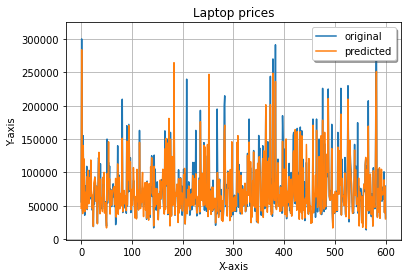

In [56]:
show_graphics(target.tolist(), predicted.tolist())

In [57]:
print(predicted.min())
print(target.min())
print(predicted.max())
print(target.max())
print(predicted.mean())
print(target.mean())

tensor(16441.2461)
tensor(13990.)
tensor(283653.0625)
tensor(309990.)
tensor(74532.5547)
tensor(76063.2500)


In [58]:
torch.save(model.state_dict(), "./model_reg")